# Introduction to Machine learning and Regression model

### Introduction
 - Definition of machine learning
 - Types of machine leaning
 - Examples of algorithms
 - Maching Learning lyf cycle
 - Main Challenge in machine learning
 
### Data source, preperation and preprocessing
   - Data sources
   - Why should data be prepared and preprocessed
   - Instances of data preparation
   - Tools for data preprocessing
 
### Introduction to python
  - Syntax
  - runtime
### Regression Model
   - Why regression
   - When use regression
   - Learning curve of regression
   - Validation
   
  ### Summar

In [1]:
DATA_PATH = "./data/forestfires.csv"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
ds = pd.read_csv(DATA_PATH)

In [4]:
ds.head(5)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [5]:
ds.sum()

X                                                     2414
Y                                                     2223
month    maroctoctmarmaraugaugaugsepsepsepsepaugsepseps...
day      frituesatfrisunsunmonmontuesatsatsatfrimonwedf...
FFMC                                               46863.3
DMC                                                  57321
DC                                                  283285
ISI                                                 4664.2
temp                                                9765.7
RH                                                   22897
wind                                                2077.1
rain                                                  11.2
area                                               6642.05
dtype: object

In [6]:
ds.count()

X        517
Y        517
month    517
day      517
FFMC     517
DMC      517
DC       517
ISI      517
temp     517
RH       517
wind     517
rain     517
area     517
dtype: int64

In [7]:
ds.median()

X         4.00
Y         4.00
FFMC     91.60
DMC     108.30
DC      664.20
ISI       8.40
temp     19.30
RH       42.00
wind      4.00
rain      0.00
area      0.52
dtype: float64

In [8]:
ds.max()

X              9
Y              9
month        sep
day          wed
FFMC        96.2
DMC        291.3
DC         860.6
ISI         56.1
temp        33.3
RH           100
wind         9.4
rain         6.4
area     1090.84
dtype: object

In [9]:
ds.min()

X           1
Y           2
month     apr
day       fri
FFMC     18.7
DMC       1.1
DC        7.9
ISI         0
temp      2.2
RH         15
wind      0.4
rain        0
area        0
dtype: object

In [10]:
ds.mean()

X         4.669246
Y         4.299807
FFMC     90.644681
DMC     110.872340
DC      547.940039
ISI       9.021663
temp     18.889168
RH       44.288201
wind      4.017602
rain      0.021663
area     12.847292
dtype: float64

In [11]:
ds.var()

X           5.353568
Y           1.512655
FFMC       30.471624
DMC      4101.951889
DC      61536.835467
ISI        20.788832
temp       33.716898
RH        266.259802
wind        3.210019
rain        0.087592
area     4052.063225
dtype: float64

In [12]:
ds.std()

X         2.313778
Y         1.229900
FFMC      5.520111
DMC      64.046482
DC      248.066192
ISI       4.559477
temp      5.806625
RH       16.317469
wind      1.791653
rain      0.295959
area     63.655818
dtype: float64

<AxesSubplot:>

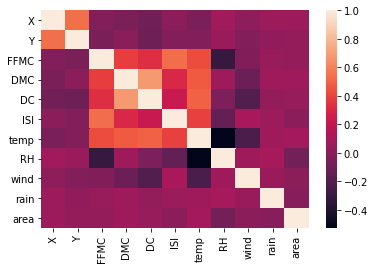

In [13]:
sns.heatmap(ds.corr())

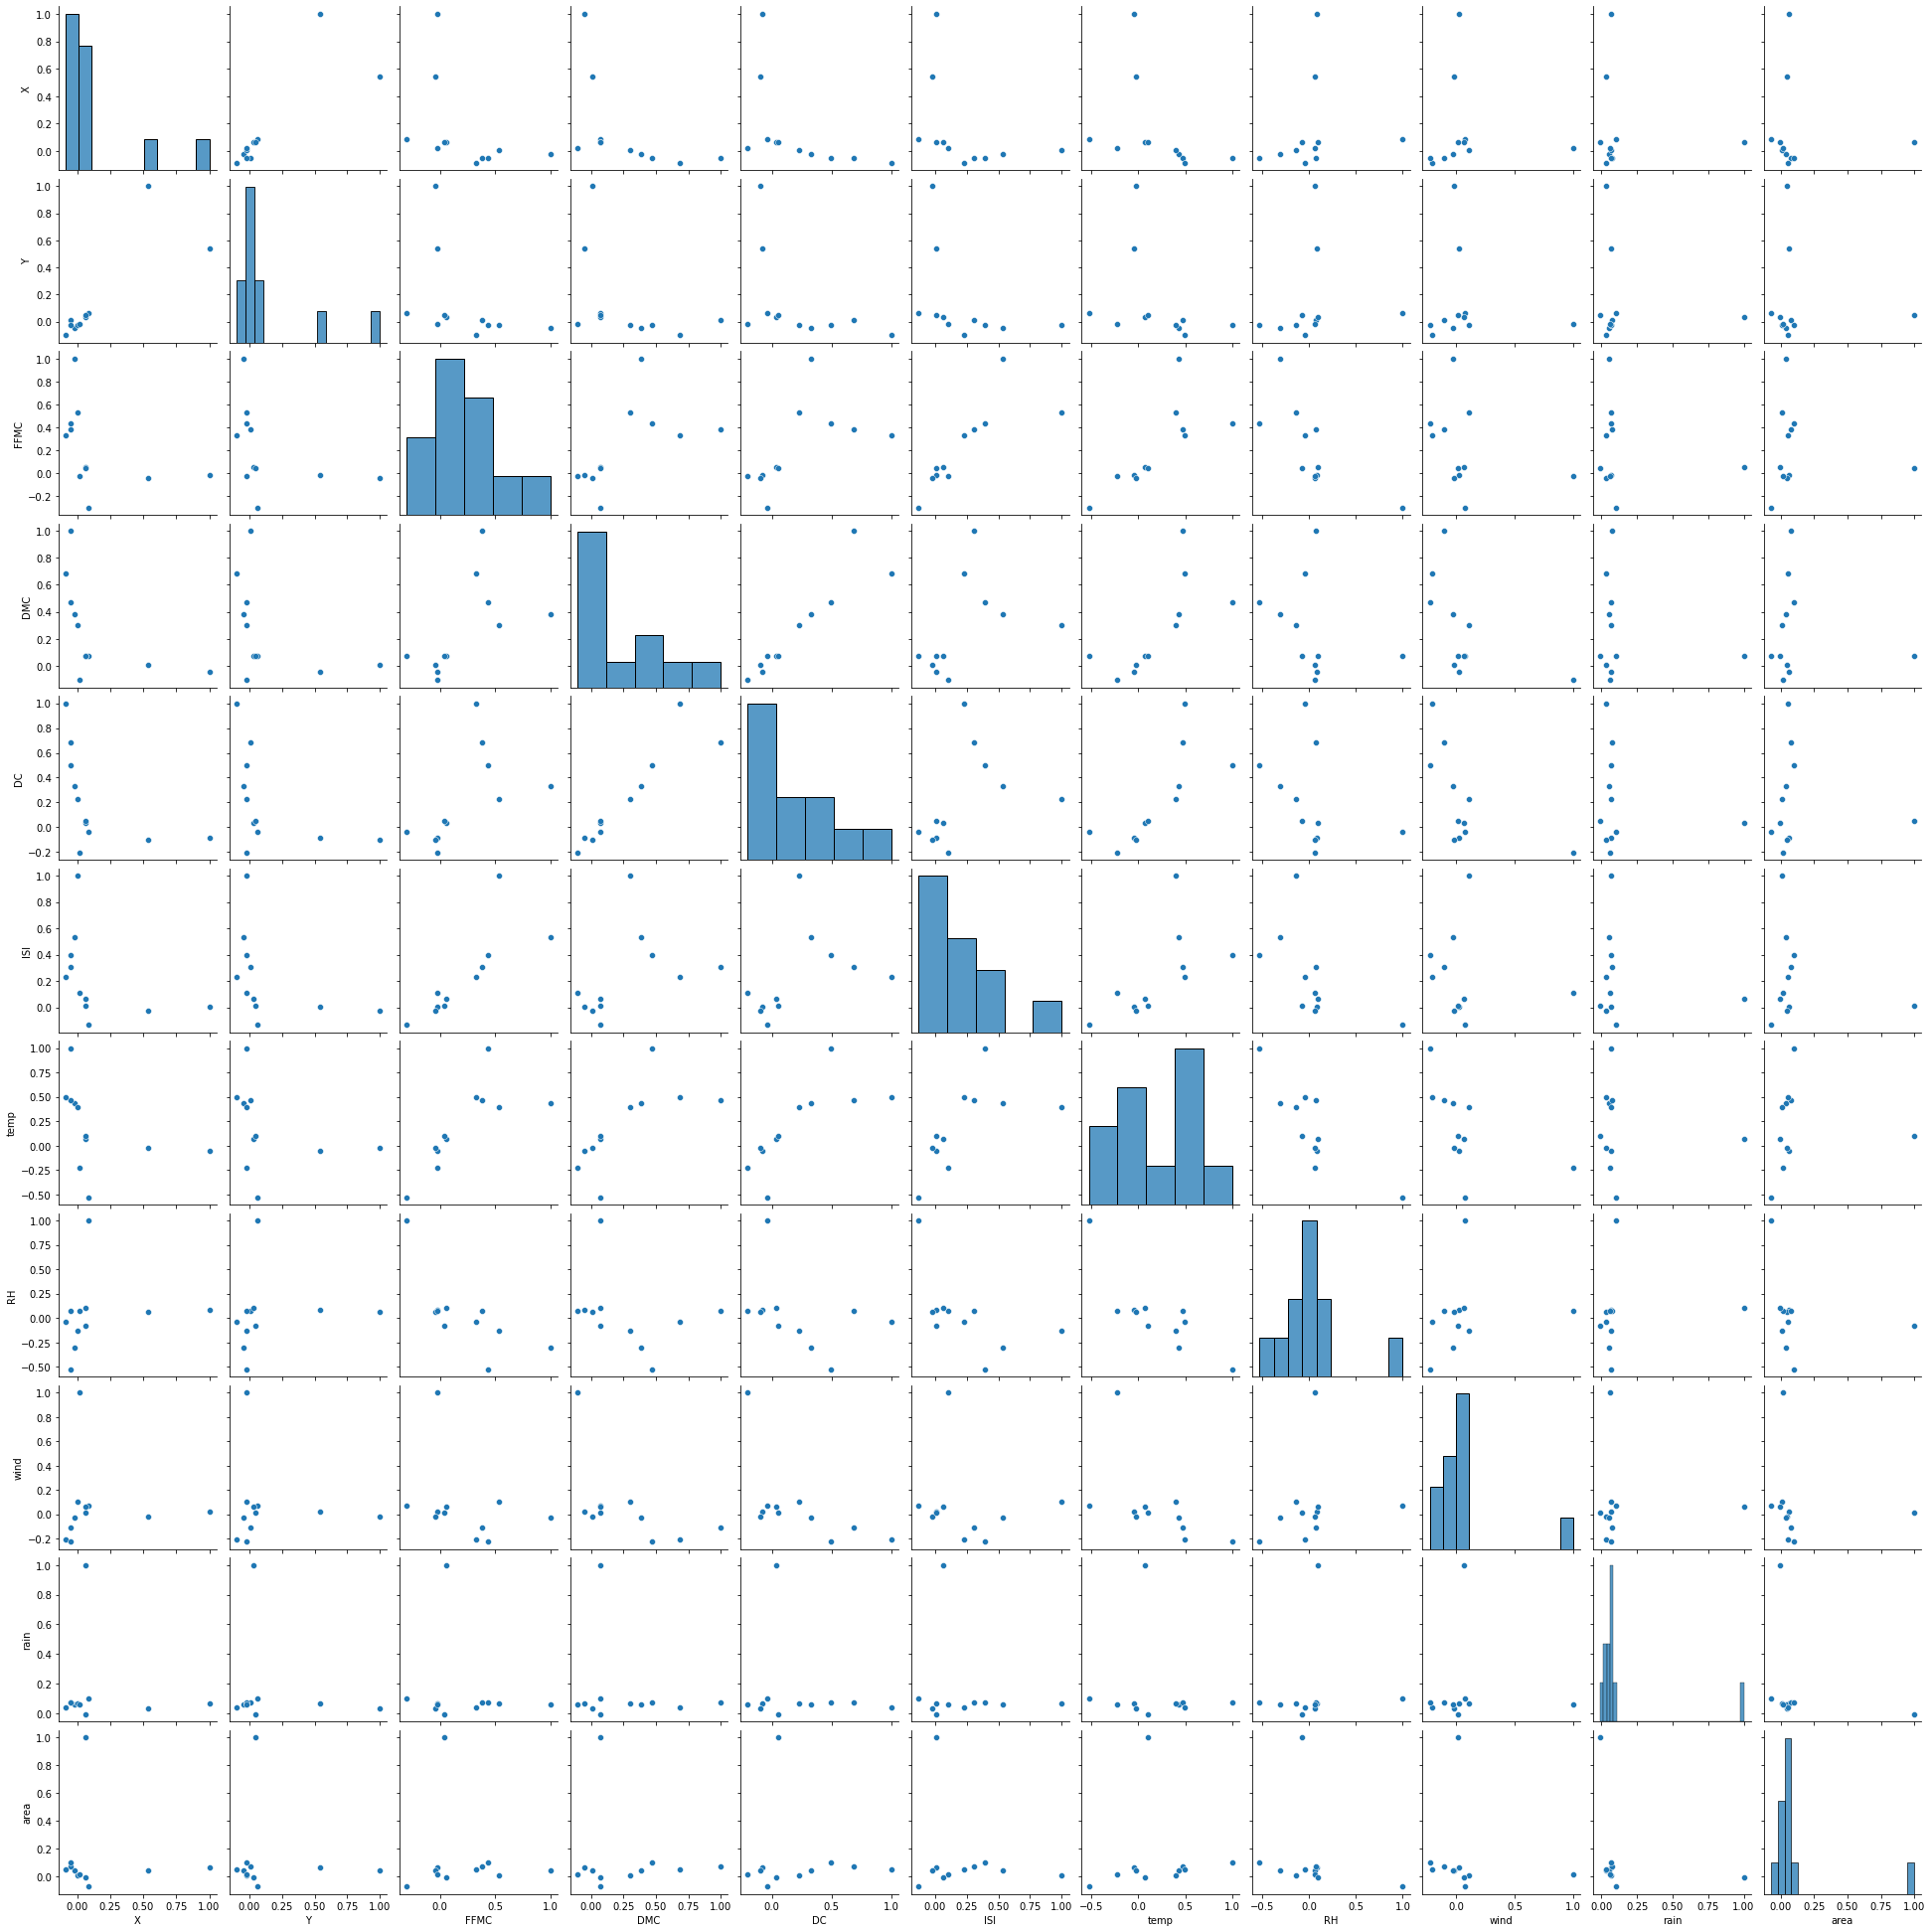

In [14]:
sns.pairplot(ds.corr())

In [15]:
ds['day'].unique()

array(['fri', 'tue', 'sat', 'sun', 'mon', 'wed', 'thu'], dtype=object)

In [16]:
ds['month'].unique()

array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
       'dec', 'may', 'nov'], dtype=object)

In [17]:
day_dummy = pd.get_dummies(ds['day'],drop_first = True)
day_dummy.head(5)

,mon,sat,sun,thu,tue,wed
0,0,0,0,0,0,0
1,0,0,0,0,1,0
2,0,1,0,0,0,0
3,0,0,0,0,0,0
4,0,0,1,0,0,0


In [18]:
month_dummy = pd.get_dummies(ds['month'],drop_first = True)
month_dummy.head(5)

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0


In [19]:
month_dummy.shape

(517, 11)

In [20]:
def generate_one_culumn_data(n)->list():
    return [0 for i in range(0,n)]

In [21]:
def generete_indices(n)->list:
    return [i for i in range(0,n)]

In [22]:
zeros_culumn = generate_one_culumn_data(len(ds))


In [23]:
zeros_indices = generete_indices(len(zeros_culumn))
zeros_indices[0:2]

[0, 1]

In [24]:
def generate_culumn_dataframe(label = None,data = None,indices = None):
    return pd.DataFrame({
        label:data
    },index = indices)


In [25]:
friday_df = generate_culumn_dataframe(label  = "fri",data =zeros_culumn,indices = zeros_indices )
friday_df.head(5)

,fri
0,0
1,0
2,0
3,0
4,0


In [26]:
april_df = generate_culumn_dataframe(label  = "apr",data =zeros_culumn,indices = zeros_indices )
april_df.head(5)

,apr
0,0
1,0
2,0
3,0
4,0


In [27]:
def concat_culmn_to_df(dataframe,culmn_df,drop_culumn  = None):
        return pd.concat([dataframe,culmn_df],axis=1) if drop_culumn == None else pd.concat([dataframe,culmn_df],axis=1).drop(drop_culumn,axis = 1)        

In [28]:
df = concat_culmn_to_df(ds,day_dummy,drop_culumn = "day")
df.head()

,X,Y,month,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,mon,sat,sun,thu,tue,wed
0,7,5,mar,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0,0,0,0,0,0
1,7,4,oct,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,1,0
2,7,4,oct,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,1,0,0,0,0
3,8,6,mar,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0,0,0,0,0,0
4,8,6,mar,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,1,0,0,0


In [29]:
df = concat_culmn_to_df(df,month_dummy,drop_culumn = "month")
df.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,0,1,0,0,0,0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,0,1,0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,0,1,0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,0,1,0,0,0,0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,0,1,0,0,0,0


In [30]:
df = concat_culmn_to_df(df,april_df)
df.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,feb,jan,jul,jun,mar,may,nov,oct,sep,apr
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,0


In [31]:
df = concat_culmn_to_df(df,friday_df)
df.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,jan,jul,jun,mar,may,nov,oct,sep,apr,fri
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,1,0,0,0,0,0,0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,1,0,0,0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,1,0,0,0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,1,0,0,0,0,0,0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,1,0,0,0,0,0,0


In [32]:

X = df.iloc[:,:-1].values
Y  = df['area']


In [33]:
print(X)

[[ 7.   5.  86.2 ...  0.   0.   0. ]
 [ 7.   4.  90.6 ...  1.   0.   0. ]
 [ 7.   4.  90.6 ...  1.   0.   0. ]
 ...
 [ 7.   4.  81.6 ...  0.   0.   0. ]
 [ 1.   4.  94.4 ...  0.   0.   0. ]
 [ 6.   3.  79.5 ...  0.   0.   0. ]]


In [34]:
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# labelEncoder = LabelEncoder()
# X[:,2] = labelEncoder.fit_transform(X[:,2])
# X[:,3] = labelEncoder.fit_transform(X[:,3])


# #One-hot encoding
# onehotEncoder = OneHotEncoder()
# x = onehotEncoder.fit_transform(X).toarray()
# # x =X


In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 0)
x_train

array([[ 3. ,  4. , 90.5, ...,  0. ,  1. ,  0. ],
       [ 4. ,  3. , 90.3, ...,  0. ,  1. ,  0. ],
       [ 1. ,  4. , 91.7, ...,  0. ,  0. ,  0. ],
       ...,
       [ 7. ,  5. , 92.5, ...,  0. ,  1. ,  0. ],
       [ 1. ,  4. , 92.5, ...,  0. ,  1. ,  0. ],
       [ 2. ,  2. , 94.8, ...,  0. ,  0. ,  0. ]])

In [36]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression( normalize=True)
regressor.fit(x_train,y_train)
regressor.score(x_test,y_test) *100

100.0

In [37]:
y_pred = regressor.predict(x_test)
y_pred

array([ 2.73500000e+01,  1.86439970e-14,  2.18000000e+00,  8.84900000e+01,
        2.69000000e+00,  3.81569730e-14,  1.94000000e+00,  4.50679284e-14,
        1.63300000e+01, -3.66687728e-14,  2.47000000e+00,  2.20300000e+01,
        1.00800000e+01,  1.56836883e-14,  1.83000000e+01, -2.22061202e-14,
        1.56000000e+00,  4.33200000e+01,  1.10000000e+00,  7.36000000e+00,
       -7.65759244e-14,  3.33000000e+00,  4.62000000e+00,  5.83000000e+00,
        7.07600000e+01,  2.42300000e+01,  7.05540686e-14, -7.93025091e-15,
        6.05773996e-14,  4.64215772e-15,  3.85774580e-14,  3.20000000e+00,
        2.21723235e-14,  8.59000000e+00,  5.86000000e+00,  1.96480000e+02,
        2.55386137e-14,  1.56000000e+00,  1.09084000e+03, -2.66810033e-14,
        5.42900000e+01, -3.68186275e-14,  4.10000000e-01,  2.58266986e-14,
       -2.88941867e-14,  1.69000000e+00,  6.30000000e+00, -1.86717513e-15,
        1.63000000e+00,  2.03000000e+00,  5.23000000e+00,  1.12200000e+01,
        2.05789622e-14,  

In [38]:
regressor.predict(np.array([[1,2,3,33,4,4,5,6,7,8,9,0,4,1,4,5,6,1,1,1,0,1,1,1,0,1,1,0,0]]))[0]

8.999999999999545

In [39]:
print(regressor.coef_)

[ 2.18902013e-15  9.55019644e-15 -3.26572919e-16  3.81969095e-17
  1.98225346e-17  6.50921043e-16  9.13984258e-16  6.49498576e-16
 -2.08173938e-15 -1.05227779e-14  1.00000000e+00 -1.52679020e-14
 -4.51300909e-15 -4.34071584e-14  2.63197306e-14 -2.49751055e-14
  3.39652472e-14 -6.79769243e-14 -1.10692881e-14 -7.16172280e-14
 -7.40023958e-14 -4.52549945e-14 -1.33783512e-13  7.03289720e-15
 -5.84628595e-14 -2.63403852e-14 -1.40003954e-13 -3.95782492e-14
  0.00000000e+00]


In [40]:
print(regressor.intercept_)

-1.9539925233402755e-14


#### Save file with joblib
  - Pickle can be used instead

In [41]:
#Saving model
import os
import joblib


def save_model(model,model_path,filename):
    if not os.path.exists(model_path):
        os.mkdir(model_path)
    joblib.dump(model,os.path.join(model_path,filename))
    

In [42]:
MODEL_DIR = "model"
save_model(regressor,MODEL_DIR,'regressor.pkl')